In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import sys
sys.path.append("..")
%cd ..

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [2]:
from DataPrep.ImportData import importer
from Modelling import modelling
import keras
from keras import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Reshape
import pyforest
import torch
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
m = modelling()
df = m.df.drop(columns=["Start Date", "Charging Time (mins)", "Total Duration (mins)", "Port Number"])

In [4]:
cols_to_standardize = ['# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event']

In [5]:
sc = StandardScaler()
stand_poi = sc.fit_transform(df[cols_to_standardize])

In [6]:
stand_poi = pd.DataFrame(stand_poi, index=df.index, columns=cols_to_standardize)

<IPython.core.display.Javascript object>

In [7]:
for i in cols_to_standardize:
    df[i] = stand_poi[i]

In [8]:
df["Label"] = df["Label"] + 1

In [9]:
df = df.drop(columns=cols_to_standardize)

In [10]:
df

,Label,Energy (kWh),CenterLon,CenterLat,Level 1,Level 2,Cluster_0.0,Cluster_1.0,Cluster_2.0,Cluster_3.0,...,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12,is_holiday,is_weekend
0,1.0,1.562364,-122.160000,37.445,0,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,1.726841,-122.160000,37.445,0,7,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1.0,2.325573,-122.160000,37.445,0,8,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,1.260311,-122.160000,37.445,0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,2.098609,-122.160000,37.445,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17281,8.0,4.018583,-122.143998,37.428,0,15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17282,8.0,4.247111,-122.143998,37.429,0,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17283,8.0,2.646125,-122.143998,37.428,0,11,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17284,8.0,4.348600,-122.143998,37.428,0,19,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
X_train,X_test, X_val,y_train,y_test, y_val = m.ttsplit(df)

In [12]:
X_train

,Label,CenterLon,CenterLat,Level 1,Level 2,Cluster_0.0,Cluster_1.0,Cluster_2.0,Cluster_3.0,Cluster_4.0,...,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12,is_holiday,is_weekend
11679,5.0,-122.139,37.445,0,31,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4457,2.0,-122.163,37.444,3,25,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11753,5.0,-122.139,37.445,0,26,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15149,7.0,-122.146,37.426,0,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,1.0,-122.160,37.444,0,18,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,7.0,-122.146,37.426,0,33,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14191,6.0,-122.158,37.448,0,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13677,6.0,-122.158,37.448,0,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4064,2.0,-122.163,37.444,1,8,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
labels = df.Label.unique()

In [14]:
stackings_X_test = []
stackings_X_train = []
stackings_X_val = []
stackings_y_test = []
stackings_y_train = []
stackings_y_val = []
for l in labels:
    stackings_X_test.append(tf.ragged.constant(X_test[X_test.Label == l]))
    stackings_y_test.append((tf.ragged.constant(y_test[X_test.Label == l])))
    stackings_X_train.append((tf.ragged.constant(X_train[X_train.Label == l])))
    stackings_y_train.append((tf.ragged.constant(y_train[X_train.Label == l])))
    stackings_X_val.append((tf.ragged.constant(X_val[X_val.Label == l])))
    stackings_y_val.append((tf.ragged.constant(y_val[X_val.Label == l])))


In [15]:
df.isna().sum().sum()

0

In [16]:
for i in range(65):
    if X_train.isna().sum()[i] > 0:
        print(i)

In [17]:
X_train.columns[14]

'Month_Day_2'

In [18]:
X_train_stack = tf.ragged.stack(stackings_X_train).to_tensor()
X_test_stack =  tf.ragged.stack(stackings_X_test).to_tensor()
X_val_stack =tf.ragged.stack(stackings_X_val).to_tensor()
y_train_stack = tf.ragged.stack(stackings_y_train).to_tensor()
y_test_stack = tf.ragged.stack(stackings_y_test).to_tensor()
y_val_stack = tf.ragged.stack(stackings_y_val).to_tensor()

In [19]:
X_train_stack[tf.math.is_nan(X_train_stack)]

<tf.Tensor: shape=(0,), dtype=float64, numpy=array([], dtype=float64)>

In [32]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

m = Sequential()
m.add(Input(shape=(None,65), dtype=tf.float32))
m.add(LSTM(68, return_sequences = True, activation = "sigmoid"))
m.add(Dense(1, activation="relu"))

m.compile(optimizer="adam", loss='mse', metrics=['acc'])

history = m.fit(tf.transpose(X_train_stack, perm = [1,0,2]), tf.transpose(y_train_stack, perm = [1,0]), epochs=30, batch_size=64, validation_data=(tf.transpose(X_val_stack, perm = [1,0,2]), tf.transpose(y_val_stack, perm = [1,0])), callbacks=tensorboard_callback)

Epoch 1/30
35/35 [==============================] - 2s 20ms/step - loss: 1.7048 - acc: 0.3062 - val_loss: 0.5074 - val_acc: 0.3273
Epoch 2/30
35/35 [==============================] - 0s 8ms/step - loss: 0.5027 - acc: 0.3100 - val_loss: 0.4770 - val_acc: 0.3273
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.4881 - acc: 0.2940 - val_loss: 0.4627 - val_acc: 0.3273
Epoch 4/30
35/35 [==============================] - 0s 6ms/step - loss: 0.4624 - acc: 0.2985 - val_loss: 0.4450 - val_acc: 0.3273
Epoch 5/30
35/35 [==============================] - 0s 7ms/step - loss: 0.4594 - acc: 0.2963 - val_loss: 0.4252 - val_acc: 0.3273
Epoch 6/30
35/35 [==============================] - 0s 7ms/step - loss: 0.4244 - acc: 0.3016 - val_loss: 0.3976 - val_acc: 0.3273
Epoch 7/30
35/35 [==============================] - 0s 7ms/step - loss: 0.3874 - acc: 0.2970 - val_loss: 0.3535 - val_acc: 0.3273
Epoch 8/30
35/35 [==============================] - 0s 7ms/step - loss: 0.3455 - acc: 0.2

In [33]:
y_pred = m.predict(tf.transpose(X_test_stack,perm=[1, 0, 2]))


In [34]:
tf.keras.utils.plot_model(m)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [35]:
import tensorboard

In [36]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 87031), started 0:07:43 ago. (Use '!kill 87031' to kill it.)

In [38]:
for i in range(8):
    mse = mean_squared_error(tf.transpose(y_pred, perm=[1,0,2])[i],tf.transpose(y_test_stack[i]))
    r2 = r2_score(tf.transpose(y_pred, perm=[1,0,2])[i],tf.transpose(y_test_stack[i]))
    print(50*"-")
    print(f"Cluster: {i}\nR^2:{r2}\nMSE:{mse}")
    print(50*"-")

--------------------------------------------------
Cluster: 0
R^2:-0.9344211058681007
MSE:0.18146841171698658
--------------------------------------------------
--------------------------------------------------
Cluster: 1
R^2:0.6740184617269516
MSE:0.24320183485401717
--------------------------------------------------
--------------------------------------------------
Cluster: 2
R^2:-0.439809742155286
MSE:0.1571298785011799
--------------------------------------------------
--------------------------------------------------
Cluster: 3
R^2:0.8983227124800824
MSE:0.4631164182004901
--------------------------------------------------
--------------------------------------------------
Cluster: 4
R^2:0.851846711902631
MSE:0.19167542229941759
--------------------------------------------------
--------------------------------------------------
Cluster: 5
R^2:0.9571319170051995
MSE:0.0982856575172263
--------------------------------------------------
-------------------------------------------

In [249]:
m.predict(np.array(X_test.iloc[0]).reshape((1, 1, 65)))

y_test.iloc[0]

<IPython.core.display.Javascript object>

1.6760682609178081

In [18]:
X_test_stack.shape

TensorShape([8, 633, 75])

In [97]:
y_pred = tf.transpose(y_pred, perm=[1,0,2])

<IPython.core.display.Javascript object>

In [37]:
tf.transpose(y_pred, perm=[1,0,2])[0].shape

<IPython.core.display.Javascript object>

TensorShape([633, 1])

In [39]:
y_test_stack[0].shape

TensorShape([633])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

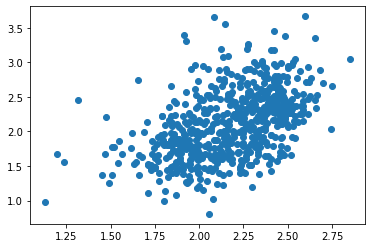

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

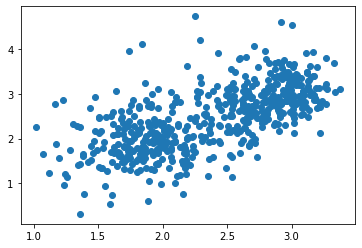

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

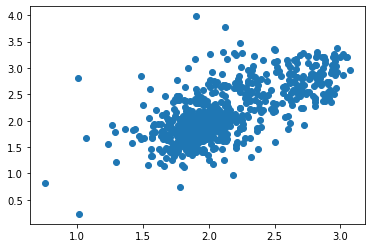

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

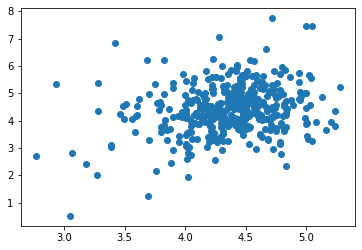

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

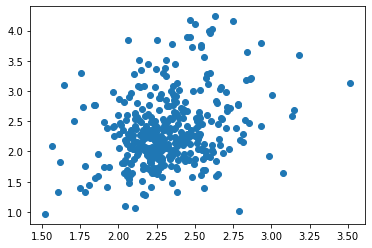

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

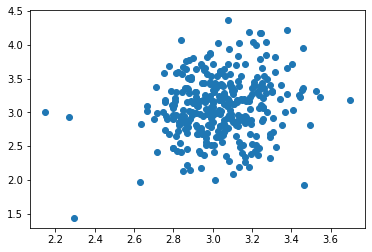

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

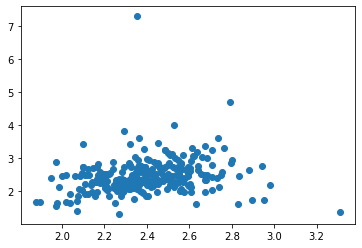

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

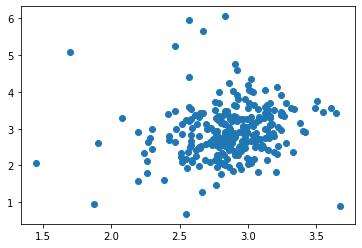

In [113]:

for i in range(8):
    plt.scatter(y_pred[i][y_pred[i] != 0], y_test_stack[i][y_test_stack[i] != 0])
    plt.show()




<IPython.core.display.Javascript object>

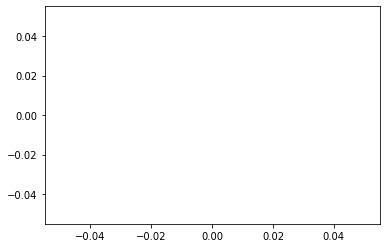

In [16]:
plt.plot(y_pred)
#plt.plot(y_test)

In [169]:
X_test_stack.to_tensor()[0][0]

<tf.Tensor: shape=(78,), dtype=float64, numpy=
array([ 0.00000000e+00,  1.85553333e+03,  2.08206667e+03,  5.90000000e+01,
       -1.22160000e+02,  3.74440000e+01,  0.00000000e+00,  3.60000000e+01,
        3.09000000e+02,  2.68000000e+02,  2.16000000e+02,  2.11000000e+02,
        1.74000000e+02,  1.38000000e+02,  1.19000000e+02,  5.80000000e+01,
        2.80000000e+01,  3.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e

In [ ]:
# evaluate predictions
print("\nMAE=%f" % mean_absolute_error(y_test_stack.to_tensor(), y_pred))
print("r^2=%f" % r2_score(y_test_stack.to_tensor()))

model.save("Models/LSTM_ragged.keras")
r2_score(self.y_test, y_pred)